In [9]:
import pandas as pd
from scipy import stats

# Load the new dataset to examine its structure
file_path = 'marketing_AB.csv'
df_new = pd.read_csv(file_path)

# Data Cleaning
df_new_cleaned = df_new.drop(columns=['Unnamed: 0'])  # Drop the index column
df_new_cleaned['converted'] = df_new_cleaned['converted'].astype(int)  # Convert 'converted' to 1 (True) / 0 (False)

# Group-level Analysis
group_summary = df_new_cleaned.groupby('test group').agg(
    Total_Users=('converted', 'count'),
    Conversion_Rate=('converted', 'mean'),
    Avg_Ads_Seen=('total ads', 'mean')
).reset_index()

# Conversion Rates Comparison
ad_group = df_new_cleaned[df_new_cleaned['test group'] == 'ad']
psa_group = df_new_cleaned[df_new_cleaned['test group'] == 'psa']

ad_conversion_rate = ad_group['converted'].mean() * 100
psa_conversion_rate = psa_group['converted'].mean() * 100

# Statistical Significance: Chi-Square Test
contingency_table = pd.crosstab(df_new_cleaned['test group'], df_new_cleaned['converted'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Prepare results for reporting
results = {
    "Group Summary": group_summary,
    "Ad Group Conversion Rate": ad_conversion_rate,
    "PSA Group Conversion Rate": psa_conversion_rate,
    "Chi-Square Test": {
        "Chi-Square Statistic": chi2,
        "P-value": p_value
    }
}

results

{'Group Summary':   test group  Total_Users  Conversion_Rate  Avg_Ads_Seen
 0         ad       564577         0.025547     24.823365
 1        psa        23524         0.017854     24.761138,
 'Ad Group Conversion Rate': 2.5546559636683748,
 'PSA Group Conversion Rate': 1.785410644448223,
 'Chi-Square Test': {'Chi-Square Statistic': 54.005823883685245,
  'P-value': 1.9989623063390075e-13}}

In [2]:
%pip install seaborn

<ipython-input-5-6ce8ba5221c1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='test group', y='converted', data=conversion_rates, palette='viridis')


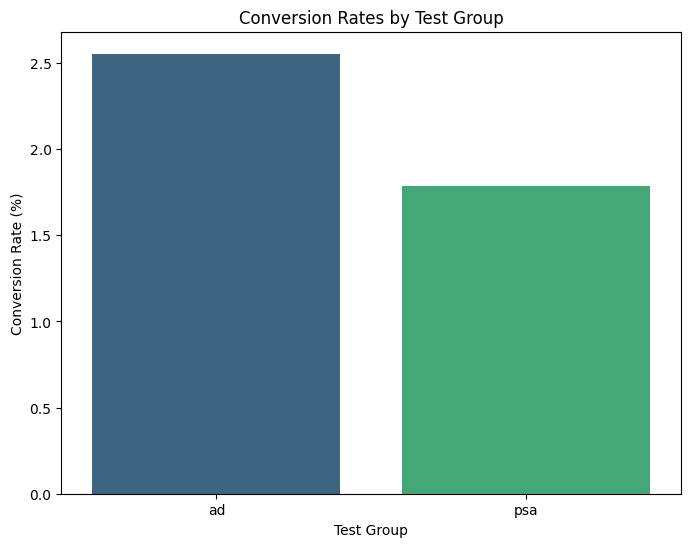

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate conversion rates for each group
conversion_rates = df_new_cleaned.groupby('test group')['converted'].mean() * 100
conversion_rates = conversion_rates.reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='test group', y='converted', data=conversion_rates, palette='viridis')
plt.title('Conversion Rates by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate (%)')
plt.show()

<ipython-input-6-dac5943b4181>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='converted', y='total ads', data=df_new_cleaned, palette='coolwarm')


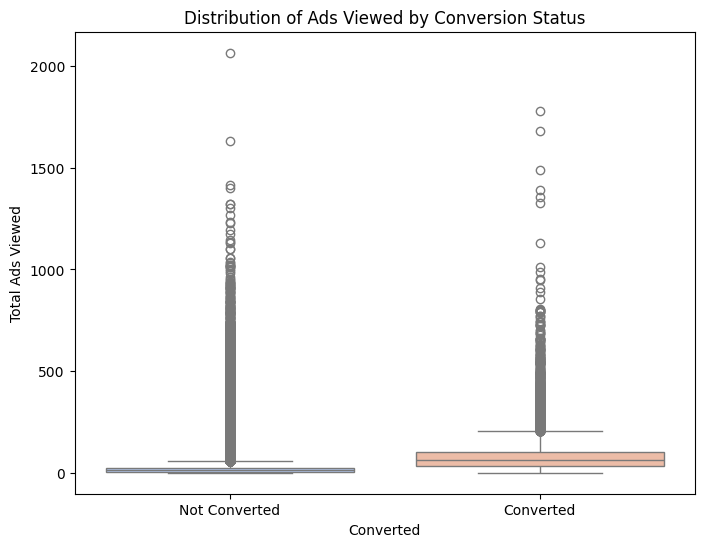

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='converted', y='total ads', data=df_new_cleaned, palette='coolwarm')
plt.title('Distribution of Ads Viewed by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Total Ads Viewed')
plt.xticks([0, 1], ['Not Converted', 'Converted'])
plt.show()

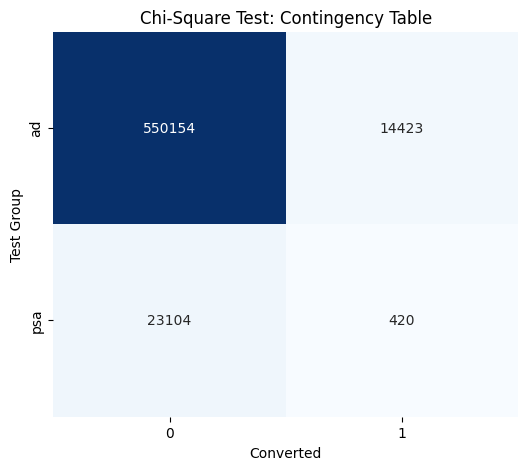

In [6]:
contingency_table = pd.crosstab(df_new_cleaned['test group'], df_new_cleaned['converted'])
plt.figure(figsize=(6, 5))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Chi-Square Test: Contingency Table')
plt.xlabel('Converted')
plt.ylabel('Test Group')
plt.show()